In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import re

In [2]:
good_review = pd.read_csv('data/samplePositive.tsv', header=0, delimiter="\t", quoting=3)

In [3]:
pd.set_option('display.max_colwidth', -1)

In [4]:
good_review

,id,category,text
0,1,1,"""Wow what a good movie. Absolutely excellent, so good. I loved it. Music, dancing, action, intrigue, really good. I'd highly recommend this excellent film."""


In [5]:
good_review['text'][0]

'"Wow what a good movie.  Absolutely excellent, so good.  I loved it.  Music, dancing, action, intrigue, really good.  I\'d highly recommend this excellent film."'

In [6]:
bad_review = pd.read_csv('data/sampleNegative.tsv', header=0, delimiter="\t", quoting=3)

In [7]:
bad_review

,id,category,text
0,1,0,"""What a terrible, terrible film. Truly bad. In fact, I might call it awful. I might have to call it awful twice. The music score was dreary, the acting was contrived, the plot was not believable or convincing. Avoid. Terrible."""


In [8]:
all_reviews = []
all_reviews.append(good_review['text'][0])
all_reviews.append(bad_review['text'][0])

In [9]:
all_reviews

['"Wow what a good movie.  Absolutely excellent, so good.  I loved it.  Music, dancing, action, intrigue, really good.  I\'d highly recommend this excellent film."',
 '"What a terrible, terrible film.  Truly bad.  In fact, I might call it awful.  I might have to call it awful twice.  The music score was dreary, the acting was contrived, the plot was not believable or convincing.  Avoid. Terrible."  ']

In [10]:
vectorizer = CountVectorizer(analyzer = "word")

In [11]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
vectorizer.fit(all_reviews)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
vectorizer.get_feature_names()

['absolutely',
 'acting',
 'action',
 'avoid',
 'awful',
 'bad',
 'believable',
 'call',
 'contrived',
 'convincing',
 'dancing',
 'dreary',
 'excellent',
 'fact',
 'film',
 'good',
 'have',
 'highly',
 'in',
 'intrigue',
 'it',
 'loved',
 'might',
 'movie',
 'music',
 'not',
 'or',
 'plot',
 'really',
 'recommend',
 'score',
 'so',
 'terrible',
 'the',
 'this',
 'to',
 'truly',
 'twice',
 'was',
 'what',
 'wow']

In [14]:
vectorizer.vocabulary_

{'absolutely': 0,
 'acting': 1,
 'action': 2,
 'avoid': 3,
 'awful': 4,
 'bad': 5,
 'believable': 6,
 'call': 7,
 'contrived': 8,
 'convincing': 9,
 'dancing': 10,
 'dreary': 11,
 'excellent': 12,
 'fact': 13,
 'film': 14,
 'good': 15,
 'have': 16,
 'highly': 17,
 'in': 18,
 'intrigue': 19,
 'it': 20,
 'loved': 21,
 'might': 22,
 'movie': 23,
 'music': 24,
 'not': 25,
 'or': 26,
 'plot': 27,
 'really': 28,
 'recommend': 29,
 'score': 30,
 'so': 31,
 'terrible': 32,
 'the': 33,
 'this': 34,
 'to': 35,
 'truly': 36,
 'twice': 37,
 'was': 38,
 'what': 39,
 'wow': 40}

In [15]:
vectorizer = CountVectorizer(analyzer = "word", stop_words = 'english', max_features = 10)
vectorizer.fit(all_reviews)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [16]:
vectorizer.get_feature_names()

['awful',
 'excellent',
 'film',
 'good',
 'music',
 'really',
 'recommend',
 'score',
 'terrible',
 'truly']

In [17]:
bad_review

,id,category,text
0,1,0,"""What a terrible, terrible film. Truly bad. In fact, I might call it awful. I might have to call it awful twice. The music score was dreary, the acting was contrived, the plot was not believable or convincing. Avoid. Terrible."""


In [18]:
negative_review_vector = vectorizer.transform([bad_review['text'][0]])

In [19]:
negative_review_vector.toarray()

array([[2, 0, 1, 0, 1, 0, 0, 1, 3, 1]])

In [20]:
positive_review_vector = vectorizer.transform([good_review['text'][0]])

In [21]:
positive_review_vector.toarray()

array([[0, 2, 1, 3, 1, 1, 1, 0, 0, 0]])

In [22]:
good_review

,id,category,text
0,1,1,"""Wow what a good movie. Absolutely excellent, so good. I loved it. Music, dancing, action, intrigue, really good. I'd highly recommend this excellent film."""


In [23]:
table = [negative_review_vector.toarray()[0], positive_review_vector.toarray()[0]]
data = pd.DataFrame(table)
data.columns = vectorizer.get_feature_names()

In [24]:
data

,awful,excellent,film,good,music,really,recommend,score,terrible,truly
0,2,0,1,0,1,0,0,1,3,1
1,0,2,1,3,1,1,1,0,0,0


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0,0.5,'GDP per capita')

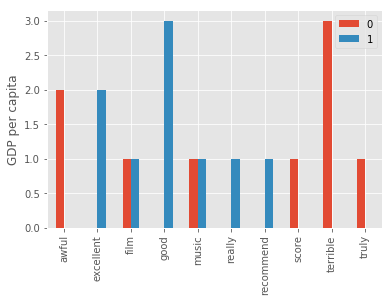

In [26]:
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('GDP per capita')

In [27]:
train = pd.read_csv('data/trainReviews.tsv', header=0, delimiter="\t", quoting=3)

In [28]:
train

id  category  \
0    858   0          
1    1762  1          
2    235   0          
3    712   0          
4    1319  1          
5    1488  1          
6    76    0          
7    69    0          
8    1144  1          
9    75    0          
10   1816  1          
11   1542  1          
12   1153  1          
13   1904  1          
14   93    0          
15   1669  1          
16   1348  1          
17   1610  1          
18   684   0          
19   918   0          
20   1314  1          
21   143   0          
22   1981  1          
23   932   0          
24   1244  1          
25   1571  1          
26   1234  1          
27   1135  1          
28   28    0          
29   401   0          
..   ...  ..          
469  1055  1          
470  140   0          
471  1075  1          
472  576   0          
473  396   0          
474  125   0          
475  554   0          
476  168   0          
477  577   0          
478  2000  1          
479  35    0          
480  1675  1          
481  307   0          
482  341   0          
483  1683  1          
484  558   0          
485  550   0          
486  199   0          
487  704   0          
488  1792  1          
489  1439  1          
490  931   0          
491  1179  1          
492  461   0          
493  323   0          
494  1578  1          
495  187   0          
496  1586  1          
497  388   0          
498  511   0          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [29]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = 'english',   \
                             max_features=10)

vectorizer.fit(train['text'])

train_data_features = vectorizer.fit_transform(train["text"])

In [30]:
vectorizer.vocabulary_

{'character': 0,
 'characters': 1,
 'film': 2,
 'good': 3,
 'just': 4,
 'like': 5,
 'movie': 6,
 'story': 7,
 'time': 8,
 'way': 9}

In [31]:
train_data_features.toarray()

array([[0, 0, 7, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 1, 0],
       [0, 0, 2, ..., 1, 0, 1],
       ..., 
       [0, 0, 2, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 3, 0]], dtype=int64)

In [32]:
train["category"]

0      0
1      1
2      0
3      0
4      1
5      1
6      0
7      0
8      1
9      0
10     1
11     1
12     1
13     1
14     0
15     1
16     1
17     1
18     0
19     0
20     1
21     0
22     1
23     0
24     1
25     1
26     1
27     1
28     0
29     0
      ..
469    1
470    0
471    1
472    0
473    0
474    0
475    0
476    0
477    0
478    1
479    0
480    1
481    0
482    0
483    1
484    0
485    0
486    0
487    0
488    1
489    1
490    0
491    1
492    0
493    0
494    1
495    0
496    1
497    0
498    0
Name: category, Length: 499, dtype: int64

In [33]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = 'english',   \
                             max_features=5000)

vectorizer.fit(train['text'])

train_data_features = vectorizer.fit_transform(train["text"])
len(train_data_features.toarray())

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

clf = RandomForestClassifier()
#clf = MLPClassifier()
clf.fit(train_data_features, train["category"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
clf.feature_importances_

array([ 0.        ,  0.        ,  0.        , ...,  0.00060297,
        0.        ,  0.        ])

In [35]:
feature_importances = dict(zip(vectorizer.get_feature_names(), clf.feature_importances_))

In [36]:
print(feature_importances)

{'000': 0.0, '10': 0.0, '100': 0.0, '1000': 0.0, '11': 0.0, '12': 0.0, '13': 0.0, '13th': 0.0, '14': 0.0, '15': 0.00074180337007663294, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0, '1950s': 0.0, '1960s': 0.0, '1968': 0.0, '1970s': 0.0, '1980s': 0.0, '1988': 0.0, '1989': 0.0, '1990s': 0.0, '1991': 0.0, '1992': 0.0, '1993': 0.0, '1994': 0.0, '1995': 0.0, '1996': 0.0, '1997': 0.0, '1998': 0.0, '1999': 0.0, '20': 0.0, '200': 0.0, '2000': 0.0, '2001': 0.0, '22': 0.0, '25': 0.0, '30': 0.0, '31': 0.0, '35': 0.0, '40': 0.0, '50': 0.0, '500': 0.0, '50s': 0.0, '54': 0.0, '60': 0.0, '60s': 0.0, '70': 0.00078848940468533284, '70s': 0.0, '80': 0.0, '80s': 0.0, '8mm': 0.0, '90': 0.0, '90s': 0.0, 'abandoned': 0.00024405674725635324, 'abigail': 0.0, 'abilities': 0.0, 'ability': 0.0, 'able': 0.0, 'aboard': 0.0006179306382146139, 'abound': 0.00067892598314877131, 'absent': 0.0, 'absolute': 0.0, 'absolutely': 0.0031623181172510881, 'absurd': 0.0, 'abusive': 0.0, 'abyss': 0.0, 'academy': 0.0012914425693738

In [37]:
import operator
sorted_feature_importances = sorted(feature_importances.items(), key=operator.itemgetter(1), reverse=True)

In [38]:
sorted_feature_importances

[('world', 0.017248708101481748),
 ('simple', 0.012264104477309398),
 ('memorable', 0.01030216663442512),
 ('bad', 0.0094970563236221571),
 ('form', 0.0090000476901927612),
 ('boring', 0.0088939093192508777),
 ('sense', 0.00869118390555099),
 ('loved', 0.007595922286965831),
 ('days', 0.0070450314276863405),
 ('hilarious', 0.0063957732061736359),
 ('excellent', 0.0058282777290865583),
 ('terrific', 0.0056656897845240254),
 ('john', 0.0056385761703946127),
 ('son', 0.0055147514101571721),
 ('tries', 0.0053581882964185744),
 ('different', 0.0048863195293769052),
 ('story', 0.0048667440879575268),
 ('knows', 0.0043724307798760631),
 ('job', 0.0043692484866659064),
 ('tv', 0.0042655901946384907),
 ('great', 0.0042181663471245467),
 ('tension', 0.0041821040533369111),
 ('music', 0.0041769091701613376),
 ('suicide', 0.0041578479483414142),
 ('pack', 0.0039923246783483786),
 ('lord', 0.0039820101304742228),
 ('impressive', 0.0039313080744963758),
 ('window', 0.0038851769510258919),
 ('nominat

In [39]:
test = pd.read_csv('data/testReviews.tsv', header=0, delimiter="\t", quoting=3)

In [40]:
test

id  category  \
0    1790  1          
1    243   0          
2    1501  1          
3    1229  1          
4    1618  1          
5    1582  1          
6    488   0          
7    1093  1          
8    1280  1          
9    1655  1          
10   1877  1          
11   1466  1          
12   134   0          
13   1192  1          
14   893   0          
15   1021  1          
16   1537  1          
17   580   0          
18   800   0          
19   212   0          
20   1796  1          
21   1769  1          
22   232   0          
23   753   0          
24   873   0          
25   299   0          
26   1195  1          
27   1709  1          
28   368   0          
29   731   0          
..   ...  ..          
470  1521  1          
471  1157  1          
472  1554  1          
473  1951  1          
474  1002  1          
475  1744  1          
476  1264  1          
477  90    0          
478  848   0          
479  591   0          
480  599   0          
481  1664  1          
482  429   0          
483  1057  1          
484  446   0          
485  1209  1          
486  973   0          
487  1871  1          
488  1197  1          
489  687   0          
490  1477  1          
491  1976  1          
492  468   0          
493  839   0          
494  262   0          
495  1316  1          
496  894   0          
497  678   0          
498  1169  1          
499  1010  1          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [41]:
test_data_features = vectorizer.transform(test['text'])
np.asarray(test_data_features)

binary_predictions = clf.predict(test_data_features)
prob_predictions = clf.predict_proba(test_data_features)

In [42]:
test_data_features.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
binary_predictions

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0,

In [44]:
prob_predictions

array([[ 0.5,  0.5],
       [ 0.4,  0.6],
       [ 0.2,  0.8],
       [ 0.3,  0.7],
       [ 0.1,  0.9],
       [ 0.4,  0.6],
       [ 0.8,  0.2],
       [ 0.8,  0.2],
       [ 0.5,  0.5],
       [ 0.4,  0.6],
       [ 0.3,  0.7],
       [ 0.4,  0.6],
       [ 0.6,  0.4],
       [ 0.4,  0.6],
       [ 0.7,  0.3],
       [ 0.6,  0.4],
       [ 0.8,  0.2],
       [ 0.8,  0.2],
       [ 0.4,  0.6],
       [ 0.3,  0.7],
       [ 0.4,  0.6],
       [ 0.3,  0.7],
       [ 0.6,  0.4],
       [ 0.7,  0.3],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.3,  0.7],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.7,  0.3],
       [ 0.6,  0.4],
       [ 0.4,  0.6],
       [ 0.5,  0.5],
       [ 0.4,  0.6],
       [ 0.5,  0.5],
       [ 0.6,  0.4],
       [ 0.3,  0.7],
       [ 0.2,  0.8],
       [ 0.4,  0.6],
       [ 0.4,  0.6],
       [ 0.7,  0.3],
       [ 0.2,  0.8],
       [ 0.7,  0.3],
       [ 0.4,  0.6],
       [ 0.3,  0.7],
       [ 0.6,  0.4],
       [ 0.1,  0.9],
       [ 0.5,

In [45]:
prob_predictions = [np.round(item[1], 2) for item in prob_predictions]

In [46]:
prediction_list = pd.DataFrame( data={"id":test["id"], "category":test['category'], "prediction":binary_predictions, "prob": prob_predictions} )
#prediction_list = pd.DataFrame( data={"id":test["id"], "review":test['text'], "category":test['category'], "prediction":binary_predictions, "prob": prob_predictions} )

In [47]:
prediction_list.head(10)

,category,id,prediction,prob
0,1,1790,0,0.5
1,0,243,1,0.6
2,1,1501,1,0.8
3,1,1229,1,0.7
4,1,1618,1,0.9
5,1,1582,1,0.6
6,0,488,0,0.2
7,1,1093,0,0.2
8,1,1280,0,0.5
9,1,1655,1,0.6


In [48]:
prediction_list

,category,id,prediction,prob
0,1,1790,0,0.5
1,0,243,1,0.6
2,1,1501,1,0.8
3,1,1229,1,0.7
4,1,1618,1,0.9
5,1,1582,1,0.6
6,0,488,0,0.2
7,1,1093,0,0.2
8,1,1280,0,0.5
9,1,1655,1,0.6


In [49]:
1 - (sum(np.absolute(prediction_list['category'] - prediction_list['prediction'])) / 500)

0.61